https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
covid_data = pd.read_csv('covid_19_india.csv')

covid_data.dropna(inplace=True)

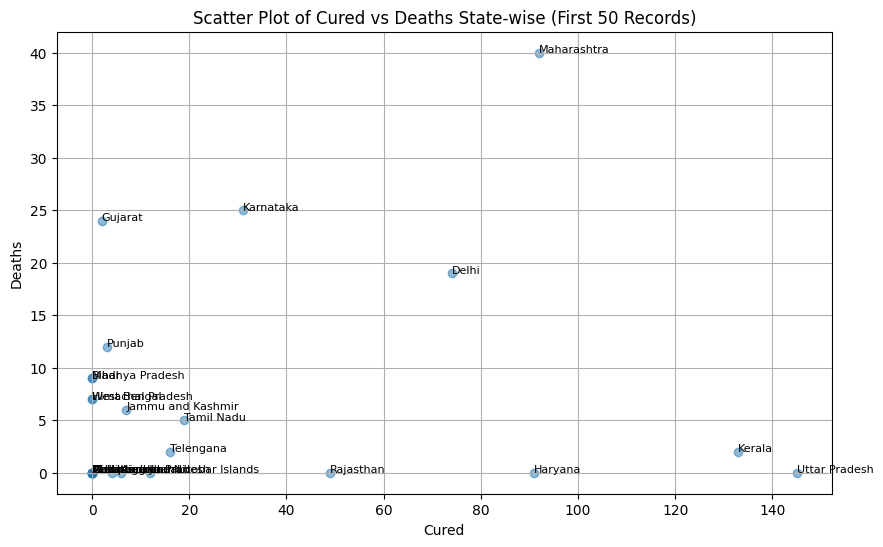

In [ ]:
covid_subset = covid_data.head(500)

# Group data by state and calculate total cured and deaths
statewise_data = covid_subset.groupby('State/UnionTerritory')[['Cured', 'Deaths']].sum().reset_index()

# Display scatter plot of cured vs deaths state-wise for the first 50 records
plt.figure(figsize=(10, 6))
plt.scatter(statewise_data['Cured'], statewise_data['Deaths'], alpha=0.5)
plt.title('Scatter Plot of Cured vs Deaths State-wise (First 50 Records)')
plt.xlabel('Cured')
plt.ylabel('Deaths')
plt.grid(True)
# Annotate points with state names
for i, txt in enumerate(statewise_data['State/UnionTerritory']):
    plt.annotate(txt, (statewise_data['Cured'][i], statewise_data['Deaths'][i]), fontsize=8)

plt.show()

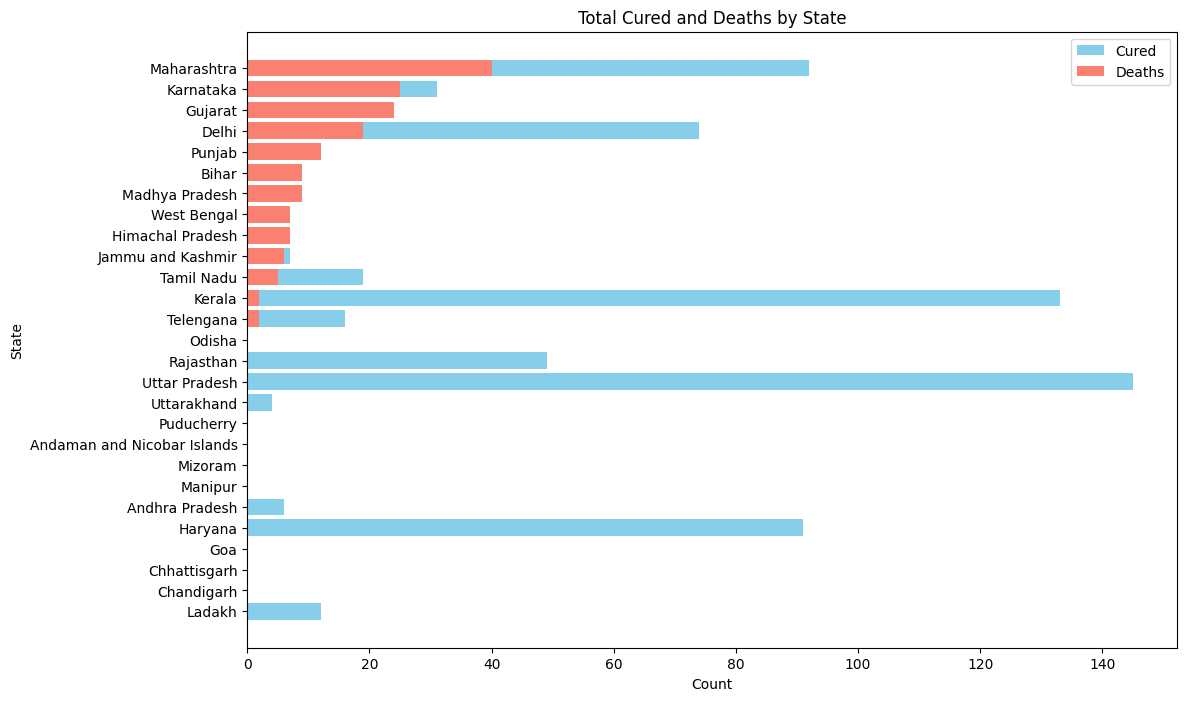

In [ ]:
# Group data by state and calculate total cured and deaths
statewise_data = covid_subset.groupby('State/UnionTerritory')[['Cured', 'Deaths']].sum().reset_index()

# Sort data by total deaths in descending order
statewise_data.sort_values(by='Deaths', ascending=False, inplace=True)

# Display bar chart of total cured and deaths by state
plt.figure(figsize=(12, 8))
plt.barh(statewise_data['State/UnionTerritory'], statewise_data['Cured'], color='skyblue', label='Cured')
plt.barh(statewise_data['State/UnionTerritory'], statewise_data['Deaths'], color='salmon', label='Deaths')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Total Cured and Deaths by State')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display top states at the top
plt.show()

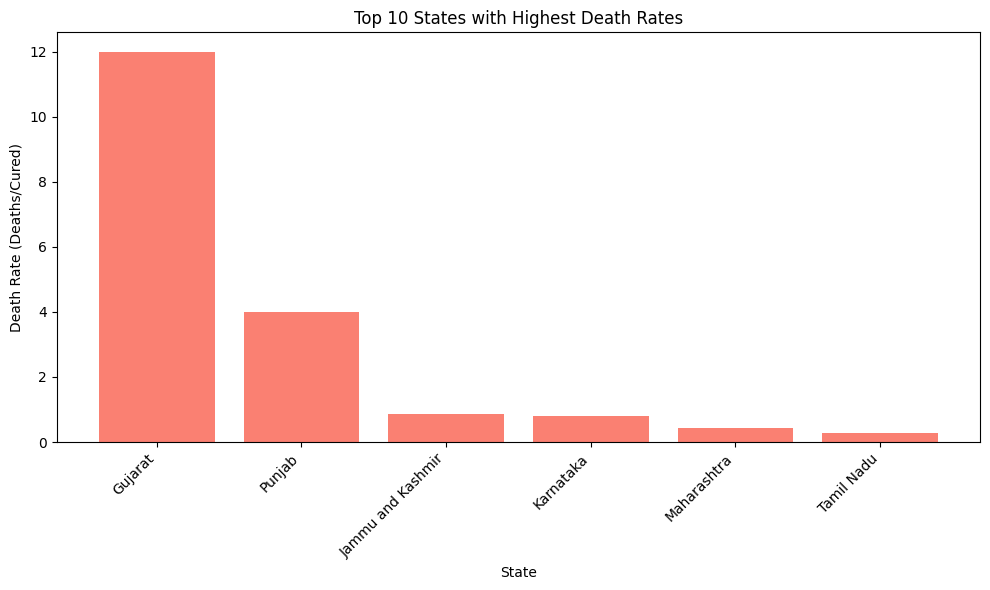

In [ ]:
# Group data by state and calculate total cured and deaths
statewise_data = covid_subset.groupby('State/UnionTerritory')[['Cured', 'Deaths']].sum().reset_index()

# Calculate death rate per state
statewise_data['Death Rate'] = statewise_data['Deaths'] / statewise_data['Cured']

# Sort data by death rate in descending order
statewise_data.sort_values(by='Death Rate', ascending=False, inplace=True)

# Select top 10 states with highest death rates
top_10_states = statewise_data.head(10)

# Display bar chart of death rates for top 10 states
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State/UnionTerritory'], top_10_states['Death Rate'], color='salmon')
plt.xlabel('State')
plt.ylabel('Death Rate (Deaths/Cured)')
plt.title('Top 10 States with Highest Death Rates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
